<a href="https://colab.research.google.com/github/konnormclean/cap-comp215/blob/main/lab1_reupload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 1
----------------
#### Name:Konnor McLean
#### Date: 2023/01/23

This lab exercise is mostly to introduce some of the power in Jupyter Notebooks.
Note that a Notebook is composed of "cells" - some are "text", like this one, while others are "code"

We'll also review some basic data types (like `int` and `str`) and data structures (like `list` and `dict`)

**New Python Concepts**:
  * `datetime.date` objects represent a calendar date (these are very powerful)
  * *list comprehension* provides a compact way to represent map and filter algorithms

As will be usual, the fist code cell, below, simply imports all the modules we'll be using...

In [ ]:
import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint    # Pretty Print - built-in python function to nicely format data structures

### API Query

Now, let's fetch some Covid-19 daily case-count data from the Open Covid API:  https://opencovid.ca/api/

Query:
  - `stat=cases`        # the type of data to fetch
  - `loc=BC`            # the location to fetch data for
  - `after=2022-11-01`  # since the 1st of november (note date format:  yyyy-mm-dd)

In [ ]:
query = 'https://api.opencovid.ca/timeseries?stat=cases&loc=BC&after=2022-11-01&hriud=593'

response = requests.request("GET", query, headers={}, data={},region={})

#dictionary with province letters and hruid codes?


print('Response data type:', type(response.text))
print(response.text)

Response data type: <class 'str'>
{"data":{"cases":[{"name":"cases","region":"BC","date":"2022-11-01","value":387875,"value_daily":62},{"name":"cases","region":"BC","date":"2022-11-02","value":387957,"value_daily":82},{"name":"cases","region":"BC","date":"2022-11-03","value":387992,"value_daily":35},{"name":"cases","region":"BC","date":"2022-11-04","value":388052,"value_daily":60},{"name":"cases","region":"BC","date":"2022-11-05","value":388112,"value_daily":60},{"name":"cases","region":"BC","date":"2022-11-06","value":388176,"value_daily":64},{"name":"cases","region":"BC","date":"2022-11-07","value":388246,"value_daily":70},{"name":"cases","region":"BC","date":"2022-11-08","value":388320,"value_daily":74},{"name":"cases","region":"BC","date":"2022-11-09","value":388398,"value_daily":78},{"name":"cases","region":"BC","date":"2022-11-10","value":388474,"value_daily":76},{"name":"cases","region":"BC","date":"2022-11-11","value":388536,"value_daily":62},{"name":"cases","region":"BC","date

Notice that the response looks like a dictionary, but is actually just a string of text (most data is exchanged on the web as plain text!).  This particular data format is called "[JSON](https://en.wikipedia.org/wiki/JSON)" 

The `json.loads` function "parses" such text and loads the data into a dictionary...

In [ ]:
result = json.loads(response.text)
pprint(result)   # pretty-print the entire data structure we got back...

{'data': {'cases': [{'date': '2022-11-01',
                     'name': 'cases',
                     'region': 'BC',
                     'value': 387875,
                     'value_daily': 62},
                    {'date': '2022-11-02',
                     'name': 'cases',
                     'region': 'BC',
                     'value': 387957,
                     'value_daily': 82},
                    {'date': '2022-11-03',
                     'name': 'cases',
                     'region': 'BC',
                     'value': 387992,
                     'value_daily': 35},
                    {'date': '2022-11-04',
                     'name': 'cases',
                     'region': 'BC',
                     'value': 388052,
                     'value_daily': 60},
                    {'date': '2022-11-05',
                     'name': 'cases',
                     'region': 'BC',
                     'value': 388112,
                     'value_daily': 60},
               

### Extract data items from a list of dictionaries
Next we use "list comprehension" to extract the list of dates and associated cases into "parallel lists"

Notice how we "parse" the date strings, using strptime, into a real date objects so they are easier to work with (format: yyyy-mm-dd)

In [ ]:
cases = result['data']['cases']
case_dates = [daily['date'] for daily in cases]     # List Comprehension #1: extract the case date strings
n_cases = [daily['value_daily'] for daily in cases] # List Comprehension #2:  extract the case counts

print('Dates:', case_dates[:10])      # do you recall the "slice" operation?  If not, look it up in the ThinkCsPy textbook!
print('Cases:', n_cases[:10])
print('Zipped:', list(zip(case_dates[:10], n_cases[:10])))  # zip is a very handy function to "zip" 2 lists together like a zipper...

Dates: ['2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10']
Cases: [62, 82, 35, 60, 60, 64, 70, 74, 78, 76]
Zipped: [('2022-11-01', 62), ('2022-11-02', 82), ('2022-11-03', 35), ('2022-11-04', 60), ('2022-11-05', 60), ('2022-11-06', 64), ('2022-11-07', 70), ('2022-11-08', 74), ('2022-11-09', 78), ('2022-11-10', 76)]


### Datetime.date
Working with date stings is a pain.  So many formats!  Even within Canada, you might see:
"Jan. 9, 2023" or "09-01-2023" or "2023-01-09" or ....
Imagine trying to do a calculation like "how many days between these 2 dates"!!
The build-in `datetime` package makes working with dates much easier.
  * step 1: "parse" the date string data (`strptime` ==  "string-parse-datetime object")
  * step 2: get the date part (i.e., without the time)

In [ ]:
# parse a datetime object from a string by supplying the correct "format" string.
datetime_objects = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in case_dates]  # List Comprehension #3

# but we only need the "date" part...
dates = [dt.date() for dt in datetime_objects]
print(dates[:10])

[datetime.date(2022, 11, 1), datetime.date(2022, 11, 2), datetime.date(2022, 11, 3), datetime.date(2022, 11, 4), datetime.date(2022, 11, 5), datetime.date(2022, 11, 6), datetime.date(2022, 11, 7), datetime.date(2022, 11, 8), datetime.date(2022, 11, 9), datetime.date(2022, 11, 10)]


## Exercise 1

In the code cell below, re-write each of the 3 "List Comprehensions" in the code cells above as a loop so you understand how they work.

Notice that a "list comprehension" is a compact way to write a "list accumulator" algorithm (and more efficient too!)

In [ ]:
# Your code here
# Your code here
import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint    # Pretty Print - built-in python function to nicely format data structures

query = 'https://api.opencovid.ca/timeseries?stat=cases&loc=BC&after=2022-11-01'

response = requests.request("GET", query, headers={}, data={})
#print('Response data type:', type(response.text))
#print(response.text)

result = json.loads(response.text)
#pprint(result)   # pretty-print the entire data structure we got back...

cases = result['data']['cases']
case_dates = [daily['date'] for daily in cases]     # List Comprehension #1: extract the case date strings
n_cases = [daily['value_daily'] for daily in cases] # List Comprehension #2:  extract the case counts


#===========================================================================================================================================================================================================================
cases_dates = []
for daily in cases:
  cases_dates.append([daily['date']])
print(cases_dates)

n_cases = []
for daily in cases:
  n_cases.append([daily['value_daily']])
print(n_cases)

datetime_objects = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in case_dates]  # List Comprehension #3

datetime_objects = []
for date in case_dates:
  datetime_objects.append([datetime.datetime.strptime(date, '%Y-%m-%d')])
print(datetime_objects)
#============================================================================================================================================================================================================================

#print('Dates:', case_dates[:10])      # do you recall the "slice" operation?  If not, look it up in the ThinkCsPy textbook!
#print('Cases:', n_cases[:10])
#print('Zipped:', list(zip(case_dates[:10], n_cases[:10])))  # zip is a very handy function to "zip" 2 lists together like a zipper...

# parse a datetime object from a string by supplying the correct "format" string.


# but we only need the "date" part...
#dates = [dt.date() for dt in datetime_objects]
#print(dates[:10])



[['2022-11-01'], ['2022-11-02'], ['2022-11-03'], ['2022-11-04'], ['2022-11-05'], ['2022-11-06'], ['2022-11-07'], ['2022-11-08'], ['2022-11-09'], ['2022-11-10'], ['2022-11-11'], ['2022-11-12'], ['2022-11-13'], ['2022-11-14'], ['2022-11-15'], ['2022-11-16'], ['2022-11-17'], ['2022-11-18'], ['2022-11-19'], ['2022-11-20'], ['2022-11-21'], ['2022-11-22'], ['2022-11-23'], ['2022-11-24'], ['2022-11-25'], ['2022-11-26'], ['2022-11-27'], ['2022-11-28'], ['2022-11-29'], ['2022-11-30'], ['2022-12-01'], ['2022-12-02'], ['2022-12-03'], ['2022-12-04'], ['2022-12-05'], ['2022-12-06'], ['2022-12-07'], ['2022-12-08'], ['2022-12-09'], ['2022-12-10'], ['2022-12-11'], ['2022-12-12'], ['2022-12-13'], ['2022-12-14'], ['2022-12-15'], ['2022-12-16'], ['2022-12-17'], ['2022-12-18'], ['2022-12-19'], ['2022-12-20'], ['2022-12-21'], ['2022-12-22'], ['2022-12-23'], ['2022-12-24'], ['2022-12-25'], ['2022-12-26'], ['2022-12-27'], ['2022-12-28'], ['2022-12-29'], ['2022-12-30'], ['2022-12-31']]
[[62], [82], [35], [60]

### Generating a plot

Finally, we'll plot the (dates,cases) data as a nice x-y line graph.

The code to format the x-axis labels is taken from https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html

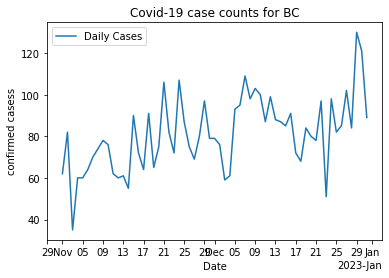

In [ ]:
def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates, n_cases, label='Daily Cases')  # Plot some data on the axes.
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('confirmed casess')  # Add a y-label to the axes.
ax.set_title("Covid-19 case counts for BC")  # Add a title to the axes.
ax.legend();




## Exercise 2

Repeat the analysis above, but this time only for Vancouver Coastal Health Region.

 * Try to modify as little code as you can (just need to change the "query"), and re-run the analysis
 * You can get the ***hruid*** location code for each health region here:  https://github.com/ccodwg/CovidTimelineCanada/blob/main/geo/hr.csv
 * Can you generalize the code in the 2nd code cell to make it easier to repeat the analysis for different locations?  What about for different dates?

## OPTIONAL - Take your skills to the next level...

## Exercise 3

Notice that the data plot looks quite erratic.  These swings most likely represent artifacts attributable to the reporting process rather than actual changes in infection rates.

 * One way to fix this is is to "smooth" the date with a "7-day rolling average".
Each day, we take the average of the previous 7 days cases.
 * Add new code cell below, compute the 7-day rolling average for each day from the cases list.
 * Create a plot to display the rolling average data and compare your plot with the one produced above.

 Hints: you are free to do this however you like, but a quite elegant solution uses list comprehension, range, and slices

[['2022-11-01'], ['2022-11-02'], ['2022-11-03'], ['2022-11-04'], ['2022-11-05'], ['2022-11-06'], ['2022-11-07'], ['2022-11-08'], ['2022-11-09'], ['2022-11-10'], ['2022-11-11'], ['2022-11-12'], ['2022-11-13'], ['2022-11-14'], ['2022-11-15'], ['2022-11-16'], ['2022-11-17'], ['2022-11-18'], ['2022-11-19'], ['2022-11-20'], ['2022-11-21'], ['2022-11-22'], ['2022-11-23'], ['2022-11-24'], ['2022-11-25'], ['2022-11-26'], ['2022-11-27'], ['2022-11-28'], ['2022-11-29'], ['2022-11-30'], ['2022-12-01'], ['2022-12-02'], ['2022-12-03'], ['2022-12-04'], ['2022-12-05'], ['2022-12-06'], ['2022-12-07'], ['2022-12-08'], ['2022-12-09'], ['2022-12-10'], ['2022-12-11'], ['2022-12-12'], ['2022-12-13'], ['2022-12-14'], ['2022-12-15'], ['2022-12-16'], ['2022-12-17'], ['2022-12-18'], ['2022-12-19'], ['2022-12-20'], ['2022-12-21'], ['2022-12-22'], ['2022-12-23'], ['2022-12-24'], ['2022-12-25'], ['2022-12-26'], ['2022-12-27'], ['2022-12-28'], ['2022-12-29'], ['2022-12-30'], ['2022-12-31']]
[[13], [15], [6], [17],

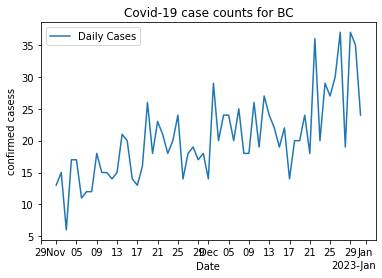

In [ ]:
#EXERCISE 1 and 2 
#593

import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint    # Pretty Print - built-in python function to nicely format data structures

query = 'https://api.opencovid.ca/timeseries?geo=hr&stat=cases&loc=593&after=2022-11-01'


response = requests.request("GET", query, headers={}, data={})
#print('Response data type:', type(response.text))
#print(response.text)

result = json.loads(response.text)
#pprint(result)   # pretty-print the entire data structure we got back...

cases = result['data']['cases']
case_dates = [daily['date'] for daily in cases]     # List Comprehension #1: extract the case date strings
n_cases = [daily['value_daily'] for daily in cases] # List Comprehension #2:  extract the case counts


#===========================================================================================================================================================================================================================
#EXERCISE_01

cases_dates = []
for daily in cases:
  cases_dates.append([daily['date']])
print(cases_dates)

n_cases = []
for daily in cases:
  n_cases.append([daily['value_daily']])
print(n_cases)

datetime_objects = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in case_dates]  # List Comprehension #3

datetime_objects = []
for date in case_dates:
  datetime_objects.append([datetime.datetime.strptime(date, '%Y-%m-%d')])
print(datetime_objects)
#============================================================================================================================================================================================================================

#print('Dates:', case_dates[:10])      # do you recall the "slice" operation?  If not, look it up in the ThinkCsPy textbook!
#print('Cases:', n_cases[:10])
#print('Zipped:', list(zip(case_dates[:10], n_cases[:10])))  # zip is a very handy function to "zip" 2 lists together like a zipper...

# parse a datetime object from a string by supplying the correct "format" string.


# but we only need the "date" part...
#dates = [dt.date() for dt in datetime_objects]
#print(dates[:10])


def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates, n_cases, label='Daily Cases')  # Plot some data on the axes.
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('confirmed casess')  # Add a y-label to the axes.
ax.set_title("Covid-19 case counts for BC")  # Add a title to the axes.
ax.legend();

